
# Accessing APIs

## Introduction

This notebook will guide you through the fundamentals of accessing and working with web APIs using Python. APIs (Application Programming Interfaces) are essential tools for modern data science, allowing you to access real-time data from countless sources including government databases, weather services, financial markets, and research institutions.

We'll work with real-world APIs to gather data about Rwanda, demonstrating practical techniques you can apply to any data science project. You'll learn to handle different types of APIs, from completely free services to those requiring authentication, while following professional best practices.

### Why This Matters

APIs are everywhere in modern data science. Whether you're building economic analysis dashboards, environmental monitoring systems, or social research platforms, the ability to programmatically access external data sources is crucial. This workshop teaches you not just how to make API calls, but how to do so reliably, ethically, and professionally.

## Learning Outcomes

By the end of this workshop, you will be able to:

1. **Make successful API requests** using Python's `requests` library, handling different authentication methods and response formats
2. **Process and analyze JSON data** returned by APIs, converting it into pandas DataFrames for further analysis
3. **Implement professional practices** including error handling, rate limiting, retry logic, and proper credential management
4. **Work with multiple API types** from free government APIs to commercial services requiring API keys
5. **Combine data from multiple sources** to create comprehensive datasets for analysis

---

# Python Setup
Lets make sure we import the required libraries

In [ ]:
import os
from dotenv import load_dotenv
import requests
from matplotlib.pyplot import figure
import matplotlib.pyplot as plt
import pandas as pd
import json
from IPython.display import Image

load_dotenv() # take environment variables from .env. file

True

# Accessing a Useless API Just to Learn
The [Open Notify API](http://open-notify.org) is an open source project to provide a simple programming interface for some of NASA’s data related
space and spacecrafts. Even though this is a toy example, the process of using APIs is similar for any 
API you will need to access in the future. For this tutorial, the task is to find the latest position of the Internation Space Station(ISS)

## Understanding The API
As mentioned during the introductory lecture, its important to read the API documentation 
and understand the available **endpoints**. Also, to determine the exact endpoint for the data we are interested in getting.
- **Base URL:** For this API, the base url is: ```http://api.open-notify.org```. So, our full url which we will pass to requests will be ```base-url + endpoint```
- **Available Endpoints/Data:** You can check [here](http://open-notify.org/Open-Notify-API/) for avaible endpoints
- **Target Endpoint:** For our task, the endpoint is ```iss-now.json```

## Making the Request
Now, lets request for the data. We create a simple function which makes the requests 
and prints the status code to see if we got a good result.

In [10]:
#entry point for the API
base_url = 'http://api.open-notify.org/'

In [11]:
# endpoint for current position of ISS
pos_now = 'iss-now.json'

In [12]:
# base_url + endpoint = full url which we can use in requests.
full_url = base_url + pos_now
full_url

'http://api.open-notify.org/iss-now.json'

In [13]:
# Make a request using requests package
response = requests.get(full_url)
print(response.status_code)

200


In [14]:
# Check the status code for response received
# 200 means everything is OK
response.status_code

200

## Use json() to retrieve the json object/data

In [15]:
# Get the data
dict_obj_from_json = response.json()
type(dict_obj_from_json)
print(dict_obj_from_json),type(dict_obj_from_json)

{'message': 'success', 'iss_position': {'longitude': '87.2369', 'latitude': '48.3381'}, 'timestamp': 1758112413}


(None, dict)

In [16]:
dict_obj_from_json.keys()

dict_keys(['message', 'iss_position', 'timestamp'])

In [ ]:
# Get the components of elements of the dictionary
#longitude, latitude and timestamp
timestamp = dict_obj_from_json['timestamp']
geo_info = dict_obj_from_json['iss_position']
geo_info

{'longitude': '87.2369', 'latitude': '48.3381'}

In [ ]:
lon = geo_info['longitude']
print(lon)
lat = geo_info['latitude']
print(lat)

In [ ]:
geo_info = dict_obj_from_json['iss_position']
lon = geo_info['longitude']
lat = geo_info['latitude']
print(lat,'--', lon)

In [ ]:
base_url = 'http://api.open-notify.org/'
#endpoint for current position of ISS
pos_now = 'iss-now.json'
# Full url
full_url = base_url + pos_now


# Make a request using requests package
r = requests.get(full_url)

# Get the data
dict_obj_from_json = r.json()

# Extract Lat/Lon
geo_info = dict_obj_from_json['iss_position']
lon = geo_info['longitude']
lat = geo_info['latitude']
print(lat,'--', lon)

In [ ]:
def request_iss_position(endpoint_url=None):
    # Make a get request 
    response = requests.get(endpoint_url)

    # Print the status code of the response.
    status_code = response.status_code
    if status_code == 200:
        print('Hooray!!, it worked')
        
        # access the returned data
        dict_obj_from_json = response.json()
        print('Type: {}'.format(type(dict_obj_from_json)))
        print('This is the nested dictionary returned: \n {}'.format(dict_obj_from_json))
        lat = dict_obj_from_json['iss_position']['latitude']
        lon = dict_obj_from_json['iss_position']['longitude']
        print('ISS is passing on Lat: {}, and Lon: {} right about now'.format(lat, lon))
    else:
        print('What happened, lets see the code we got: {}'.format(status_code))

In [ ]:
base_url = 'http://api.open-notify.org/'
iss_pos = base_url + 'iss-now.json'
request_iss_position(endpoint_url=iss_pos)

In [ ]:
# Now, try to enter a wrong endpoint and see what happens
iss_pos2 = base_url + 'iss-today.json'
request_iss_position(endpoint_url=iss_pos2)

# Accessing the Data
Now, lets change our function so that we print the Latitude and Longitude of where ISS is right now.

In [7]:
request_iss_position(endpoint_url='http://api.open-notify.org/iss-now.json')
request_iss_position

NameError: name 'request_iss_position' is not defined

# EXERCISE-1:
Using the same API, check how many Astronouts are in space right now?

In [ ]:
# base-url is same as above
# end point for this data: please check documentation
num_astros = 'http://api.open-notify.org/astros.json'

# full_url number of astronouts
num_astros_url ="http://api.open-notify.org/astros.json?callback=CALLBACK" 
 
# Make request
response = requests.get(num_astros_url)

# Get data if response is 200
if response.status_code == 200:
    # Extract the dict object from the JSON response
    res = response.json().loads(response)
    
    # please print the dict object above so you can inspect it and see how to retrieve the required data
    print(res)
    
    # Get the number of people in spacw
    #YOUR CODE
    
    # print number of people
    #YOUR CODE

# Accessing the Open Weather API
## About the API
You can read all about it [here](https://openweathermap.org). In summary, they provide weather data for cities across  the world. When you read the API documentation there are several things you need to be aware of and check as follows:
1. How to get credentials to enable access to the API. We only need an API key in this case. Did you get yours?
2. How to make API calls. What type of parameters are required to make and API call to this particular API. In this case, you will note that you will need location.
3. What type of information is available
4. Whats the cost of accessing the data. If free, are there any limits.

## Potential Use Cases
1. **A Weather app on a Smartphone.** Extract data from the API and use it on your app

2. **Historical climate data analysisis for multiple cities.** With climate change being a big thing now, you may want to do analysis comparing weather information across multiple cities.

The API has many versions and subscriptions plans but in our exercise, we will use their 2.5 version which is the one which doesnt require subscription.

<>:1: SyntaxWarning: invalid escape sequence '\D'
<>:1: SyntaxWarning: invalid escape sequence '\D'
C:\Users\evariste.manirumva\AppData\Local\Temp\ipykernel_2972\2533427561.py:1: SyntaxWarning: invalid escape sequence '\D'
  Image("D:\Documents\AIMS_DSCBI_Training\AIMS-DSCBI\docs\images\logo-aims.png")


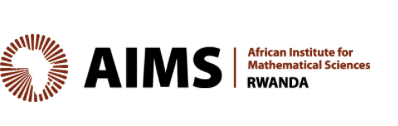

In [43]:
Image("D:\Documents\AIMS_DSCBI_Training\AIMS-DSCBI\docs\images\logo-aims.png")

## Example Task: Get current weather data and forecasts for a given city or multiple cities
Given a city name, lets get current weather data and forecasts and then save that information as a CSV file. 
We are only interested in the following variables:
- **Weather:** temp, min and max temperature, humidity
- **Other:** Date, with no time

### Approach
We will achieve this by defining three main functions:
1. A small helper function to retrieve city ID from given city name just because using ID is easier than name
2. A function to make thr API call and retrieve the weather data
3. A function to take the returned data, put it into a pandas dataframe.
4. A function putting everything together 

In [37]:
def get_weather(base_url, category='forecast', api_key=None, city_id=None, lat=None, lon=None):
    """
    Use request to make a get request to the open weather API
    :param api_key: This is taken from the API documentation
    :param category: Wether to get current weather, forecast or other type. Check API docs for details.
    :param city_id: ID for the city we need taken from the city.list.json provided by the API
    :param api_key: The API key you got from the API 
    :param lon: Longitude in case we want to use latitude and longitude
    :param lat: Latitude in case we want to use latitude and longitude
    
    :return: A JSON oobject with the data
    """
    # Create full_url based on whether we are using lat/lon, city ID
    if city_id:
        full_url = "{}{}?id={}&APPID={}".format(base_url, category, city_id, api_key)
    
    # use requests to retrieve data from the API
    response = requests.get(full_url)

    # retrieve JSON from the response object
    if response.status_code == 200:
        json_obj = response.json()
    else:
        print('Something went wrong, see error below')
        print(response.status_code)

    # return the JSON object
    return json_obj

In [7]:
def city_id_from_name(city_file, name):
    """
    Retrieve city ID given city name
    :param city_file: JSON file with list of city names and corresponding IDs provided by open weather API
    :param name: Name of city which we want to retrieve ID for
    :return: An integer representing city ID
    """
    # Load JSON file
    fopen = open(city_file, encoding="utf8")
    city_list = json.load(fopen)
    
    # Get city ID which matches with city name
    for c in city_list:
        if c['name'] == name:
            return c['id'] 

In [8]:
def weather_json_to_pandas_df(weather_json):
    """
    Converts the JSON with weather data into a pandas Dataframe
    :param weather_json:The JSON object with weather information
    :return: A pandas Dataframe
    """
    
    # using method for accessing a dictionary
    # put weather items in a list
    weather_items = weather_json['list']
    
    # save into a dataframe
    data = []  # will hold our data
    
    for i in weather_items:
        # get forecast time and truncate to date only
        date_str = i['dt_txt'][:10]
    
        # get temperature, rain and humidity
        temp = i['main']['temp']
        temp_min = i['main']['temp_min']
        temp_max = i['main']['temp_max']
        hum = i['main']['humidity']
    
        data_item = {'Date': date_str, 'tempF': temp,'tempF_min': temp_min, 
                     'tempF_max': temp_min, 'humidity': hum}
    
        # append to list of create earlier on
        data.append(data_item)
    

    # create dataframe
    df = pd.DataFrame(data)
    
    return df

In [41]:
def save_weather_data(city_name, csv_filename, city_list_file):
    """
    Puts everything together and saves weather into CSV file
    :param city_name: Target city name
    :param csv_filename: Full path of CSV filen to save data
    :param city_list_file: File containing city names and IDs
    :return: Saves data into CSV
    """
    # ==============================
    # GET WEATHER DATA
    # ==============================
    # Retrieve city ID and get data
    cityid = city_id_from_name(city_list_file, city_name)
    print('City-ID for {} is {}'.format(city_name, cityid))
    
    weather_data = get_weather(base_url=BASE_URL, api_key=API_KEY,
                           city_id=cityid)
    
    # Put data into Pandas Dataframe
    df = weather_json_to_pandas_df(weather_json=weather_data)
    
    # Add city name 
    df['City'] = city_name
    print()
    print('First few rows of the data')
    print(df.head())
    
    # Save data into CSV
    df.to_csv(csv_filename, index=False)
    
    print()
    print('Successfully Saved CSV file')
    print("============================")
    
    return df

## Simple Request on Weather API Using City Name
- ```BASE_URL: https://api.openweathermap.org/data/```
-
### Parameters:
- version: 2.5 for free plans
- category: weather 
    - weather (current weather by city)
    - forecast (5-day forecast)
- Location (city name, lat/lon, city id)
- API key

In [22]:
# string concatenation to create full URL
# --- IGNORE ---
first_name = "John"
last_name = "Doe"
full_name = first_name + " " + last_name
full_name = "{} {}".format(first_name, last_name)
print(full_name)

John Doe


In [40]:
# ========================================================
# HARD CODE BASE INFORMAITON AND USE THEM AS GLOBAL VARS
# ========================================================
# Harcode base URL, we use the 2.5 version which seems to be the free version with no need to subscribe
BASE_URL = "https://api.openweathermap.org/data/2.5/"

API_KEY = os.getenv("OPENWEATHER_API_KEY")


# create full URL for current weather in Kigali
# concatenatation strings is done here (base_url, category, city_name, API_KEY)
category = 'weather'
city_name = "Kigali"
full_url = "{}{}?q={}&APPID={}".format(BASE_URL, category, city_name, API_KEY)
print(full_url)


# Send request
response_w = requests.get(full_url, timeout=5)
print("URL:", response_w.url)
print("Status:", response_w.status_code)
print("Body:", response_w.text)  # if 401, body text is usually explicit


https://api.openweathermap.org/data/2.5/weather?q=Kigali&APPID=727c18f373649f4d8b3545ed4564afb0
URL: https://api.openweathermap.org/data/2.5/weather?q=Kigali&APPID=727c18f373649f4d8b3545ed4564afb0
Status: 200
Body: {"coord":{"lon":30.0588,"lat":-1.95},"weather":[{"id":802,"main":"Clouds","description":"scattered clouds","icon":"03d"}],"base":"stations","main":{"temp":299.86,"feels_like":300.14,"temp_min":299.86,"temp_max":299.86,"pressure":1010,"humidity":47,"sea_level":1010,"grnd_level":849},"visibility":10000,"wind":{"speed":2.57,"deg":130},"clouds":{"all":40},"dt":1758115628,"sys":{"type":1,"id":2594,"country":"RW","sunrise":1758081081,"sunset":1758124644},"timezone":7200,"id":202061,"name":"Kigali","cod":200}


In [ ]:
# Get the data (weather for today in Kigali)
weather_today_kigali = response_w.json()
print(weather_today_kigali)

#get elements of the dictionary data
weather_today_kigali['main'],['temp']

{'coord': {'lon': 30.0588, 'lat': -1.95}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10d'}], 'base': 'stations', 'main': {'temp': 299.86, 'feels_like': 300.3, 'temp_min': 299.86, 'temp_max': 299.86, 'pressure': 1010, 'humidity': 50, 'sea_level': 1010, 'grnd_level': 849}, 'visibility': 10000, 'wind': {'speed': 4.63, 'deg': 160}, 'rain': {'1h': 0.2}, 'clouds': {'all': 40}, 'dt': 1758114265, 'sys': {'type': 1, 'id': 2594, 'country': 'RW', 'sunrise': 1758081081, 'sunset': 1758124644}, 'timezone': 7200, 'id': 202061, 'name': 'Kigali', 'cod': 200}


({'temp': 299.86,
  'feels_like': 300.3,
  'temp_min': 299.86,
  'temp_max': 299.86,
  'pressure': 1010,
  'humidity': 50,
  'sea_level': 1010,
  'grnd_level': 849},
 ['temp'])

## Use Functions to Get 16 Days Forecast

In [42]:
# =======================================
# GET WEATHER FORECAST DATA FOR LILONGWE
# =======================================
city = 'Kigali'
city_json = "D:\Documents\AIMS_DSCBI_Training\AIMS-DSCBI\data\city.list.json"
out_csv = "D:\Documents\AIMS_DSCBI_Training\AIMS-DSCBI\Output\LL-weather.csv"
df_weather = save_weather_data(city_name=city, csv_filename=out_csv, city_list_file=city_json)

<>:5: SyntaxWarning: invalid escape sequence '\D'
<>:6: SyntaxWarning: invalid escape sequence '\D'
<>:5: SyntaxWarning: invalid escape sequence '\D'
<>:6: SyntaxWarning: invalid escape sequence '\D'
C:\Users\evariste.manirumva\AppData\Local\Temp\ipykernel_2972\3668548327.py:5: SyntaxWarning: invalid escape sequence '\D'
  city_json = "D:\Documents\AIMS_DSCBI_Training\AIMS-DSCBI\data\city.list.json"
C:\Users\evariste.manirumva\AppData\Local\Temp\ipykernel_2972\3668548327.py:6: SyntaxWarning: invalid escape sequence '\D'
  out_csv = "D:\Documents\AIMS_DSCBI_Training\AIMS-DSCBI\Output\LL-weather.csv"


City-ID for Kigali is 202061

First few rows of the data
         Date   tempF  tempF_min  tempF_max  humidity    City
0  2025-09-17  297.34     292.29     292.29        59  Kigali
1  2025-09-17  294.00     291.07     291.07        77  Kigali
2  2025-09-17  290.89     290.89     290.89        92  Kigali
3  2025-09-18  290.04     290.04     290.04        93  Kigali
4  2025-09-18  289.44     289.44     289.44        93  Kigali

Successfully Saved CSV file


## EXERCISE-1: Instead of using city ID, lets use latitude and longitude to get the same information.

### Task description:
- Modify the ```get_weather()``` so that it takes in latitude and longitude and returns today's temperature in degress Celsius.
- To test your function, get current weather data for 'lon': 30.1289, 'lat': -1.9695 and print out the **temperature, place name and country**. The result will look like screenshot below.

### Tips:
- Go to the API documentation to find out how to use lat and lon in the API call
- Also, use the API documentation to check how to change the units 

# https://api.openweathermap.org/data/2.5/weather?lat={lat}&lon={lon}&appid={727c18f373649f4d8b3545ed4564afb0}

In [ ]:
# =======================================
# GET WEATHER FORECAST DATA FOR LILONGWE
# =======================================
city = 'Kigali'
city_json = "D:\Documents\AIMS_DSCBI_Training\AIMS-DSCBI\data\city.list.json"
out_csv = "D:\Documents\AIMS_DSCBI_Training\AIMS-DSCBI\Output\LL-weather.csv"
df_weather = save_weather_data(city_name=city, csv_filename=out_csv, city_list_file=city_json)